In [83]:
from body_matrix import load, infer, process, measure, draw, export
video, frame_counts, fps, sample_frame = load.video(
	"/Users/troydo42/Desktop/Raw_Vids/286021.mp4", 
	-90, 
	1
)

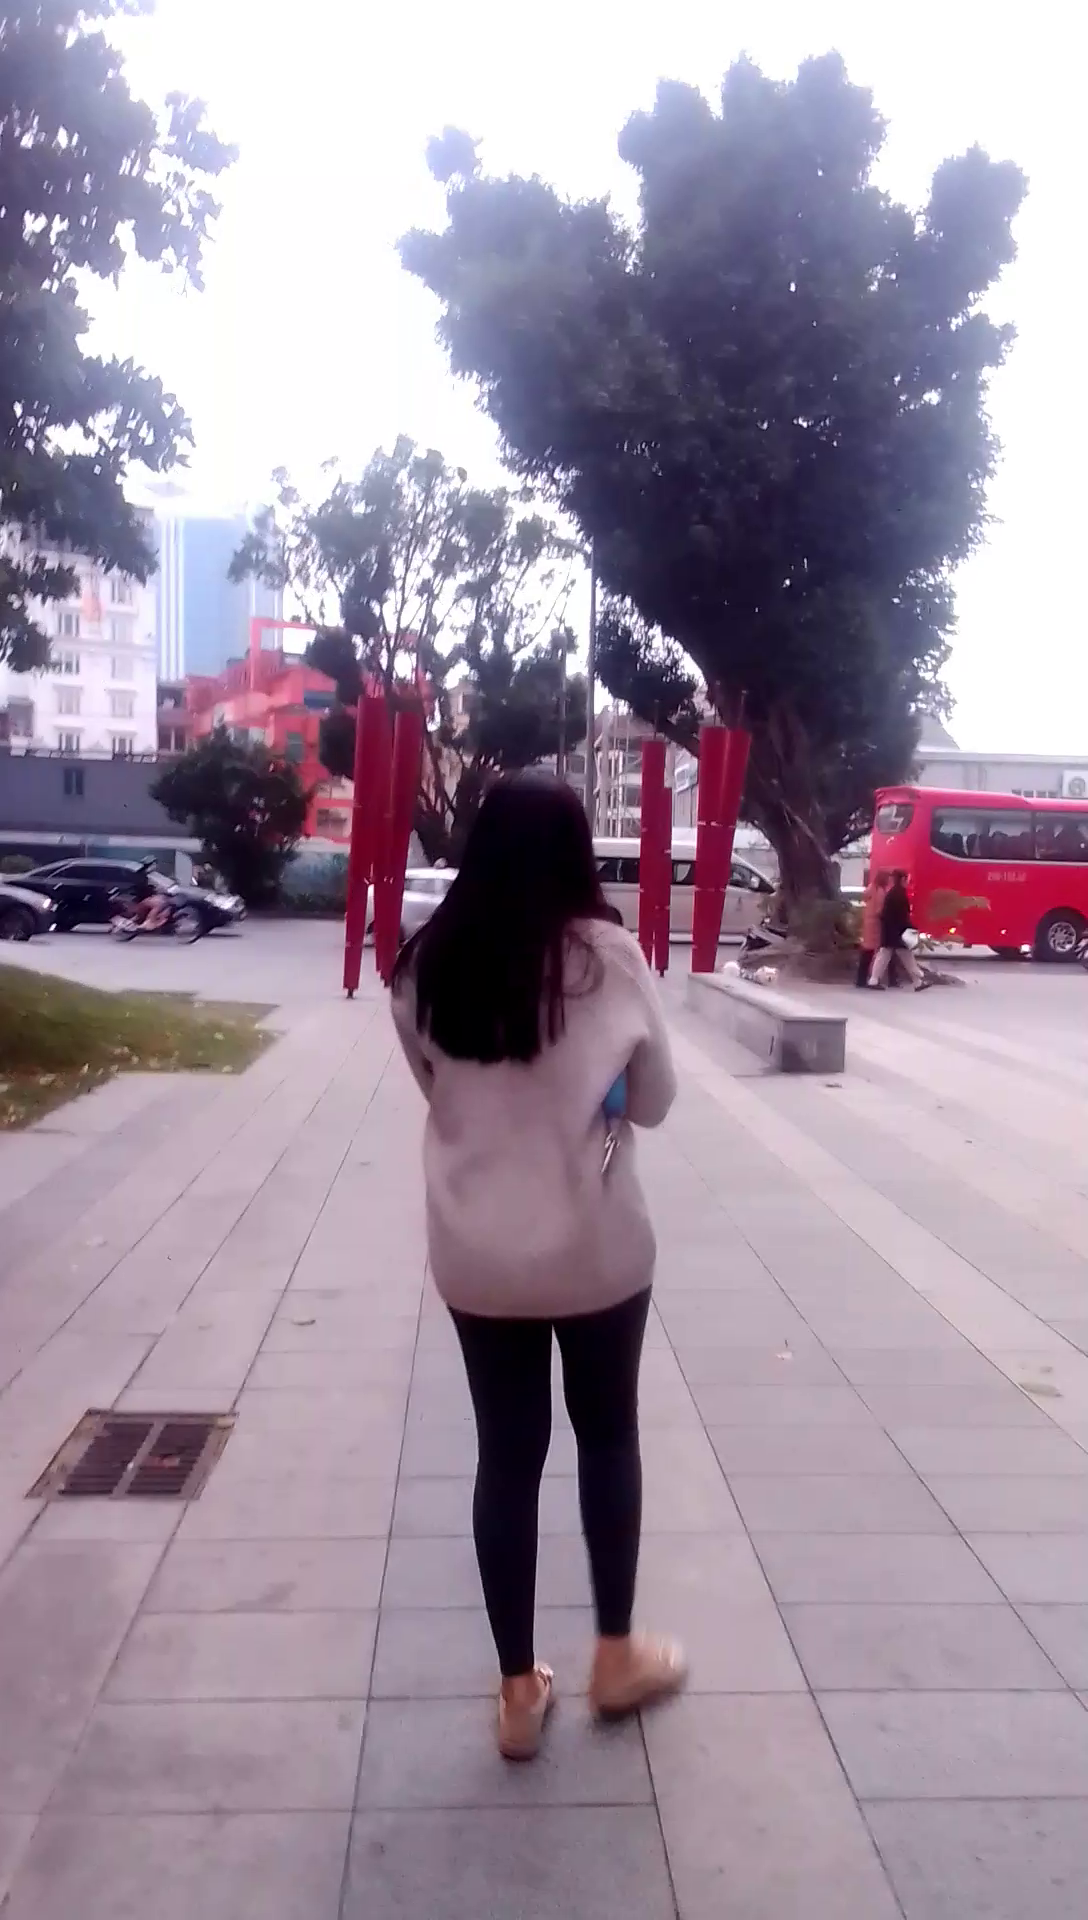

In [84]:
sample_frame

In [85]:
frame_counts

83

In [86]:
keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

selected_kps = process.keypoints_filter(
    [
        'left_eye', 'right_eye',
        'left_ear', 'right_ear',
        'left_shoulder','right_shoulder',
        'left_wrist','right_wrist',
        'left_hip', 'right_hip',
        'left_ankle', 'right_ankle'
    ],  
    keypoints
)

segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

hip_kps = process.find_hip_points(
    selected_kps['left_hip'], 
    selected_kps['right_hip'],
    selected_kps['left_wrist'],
    selected_kps['right_wrist'],
    segment_area
)

shoulder_point = process.find_shoulder_points(
    selected_kps['left_shoulder'],
    selected_kps['right_shoulder'],
    segment_area
)

Found  3  person in the frame
Distances:  [4.6946258544921875, 357.71270751953125, 328.79632568359375]
Areas:  [309102.5849272795, 7238.688030660152, 4190.567056313157]
FOCUSES:  [65841.79325632645, 20.23603824660022, 12.745176052684391]
Select keypoint index 0
Found  3  person in the frame
[384.28985595703125, 757.6371459960938, 687.038330078125, 1751.9239501953125]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[868.923583984375, 872.0135498046875, 930.5077514648438, 992.1439819335938]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[863.081787109375, 787.0054931640625, 1087.1761474609375, 962.7617797851562]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[6.365538989785575, 487.26694569690574, 581.5996742797215]
6.365538989785575 0


In [87]:
shoulder_line = measure.two_points_distance(
    shoulder_point['left_shoulder'],
    shoulder_point['right_shoulder']
)

middle_eye = measure.find_middle_point(
    selected_kps['left_eye'], 
    selected_kps['right_eye']
)

middle_hip = measure.find_middle_point(
    hip_kps['left_hip'],
    hip_kps['right_hip']
)

eye_line = measure.two_points_distance(
    selected_kps['left_eye'], 
    selected_kps['right_eye']
)

hip_line = measure.two_points_distance(
    hip_kps['left_hip'],
    hip_kps['right_hip']
)

middle_eye_hip = measure.two_points_distance(
    middle_eye, 
    middle_hip
)

In [88]:
chin_point = (
    middle_eye[0],
    middle_eye[1] + eye_line * middle_eye_hip /(eye_line + hip_line)
)

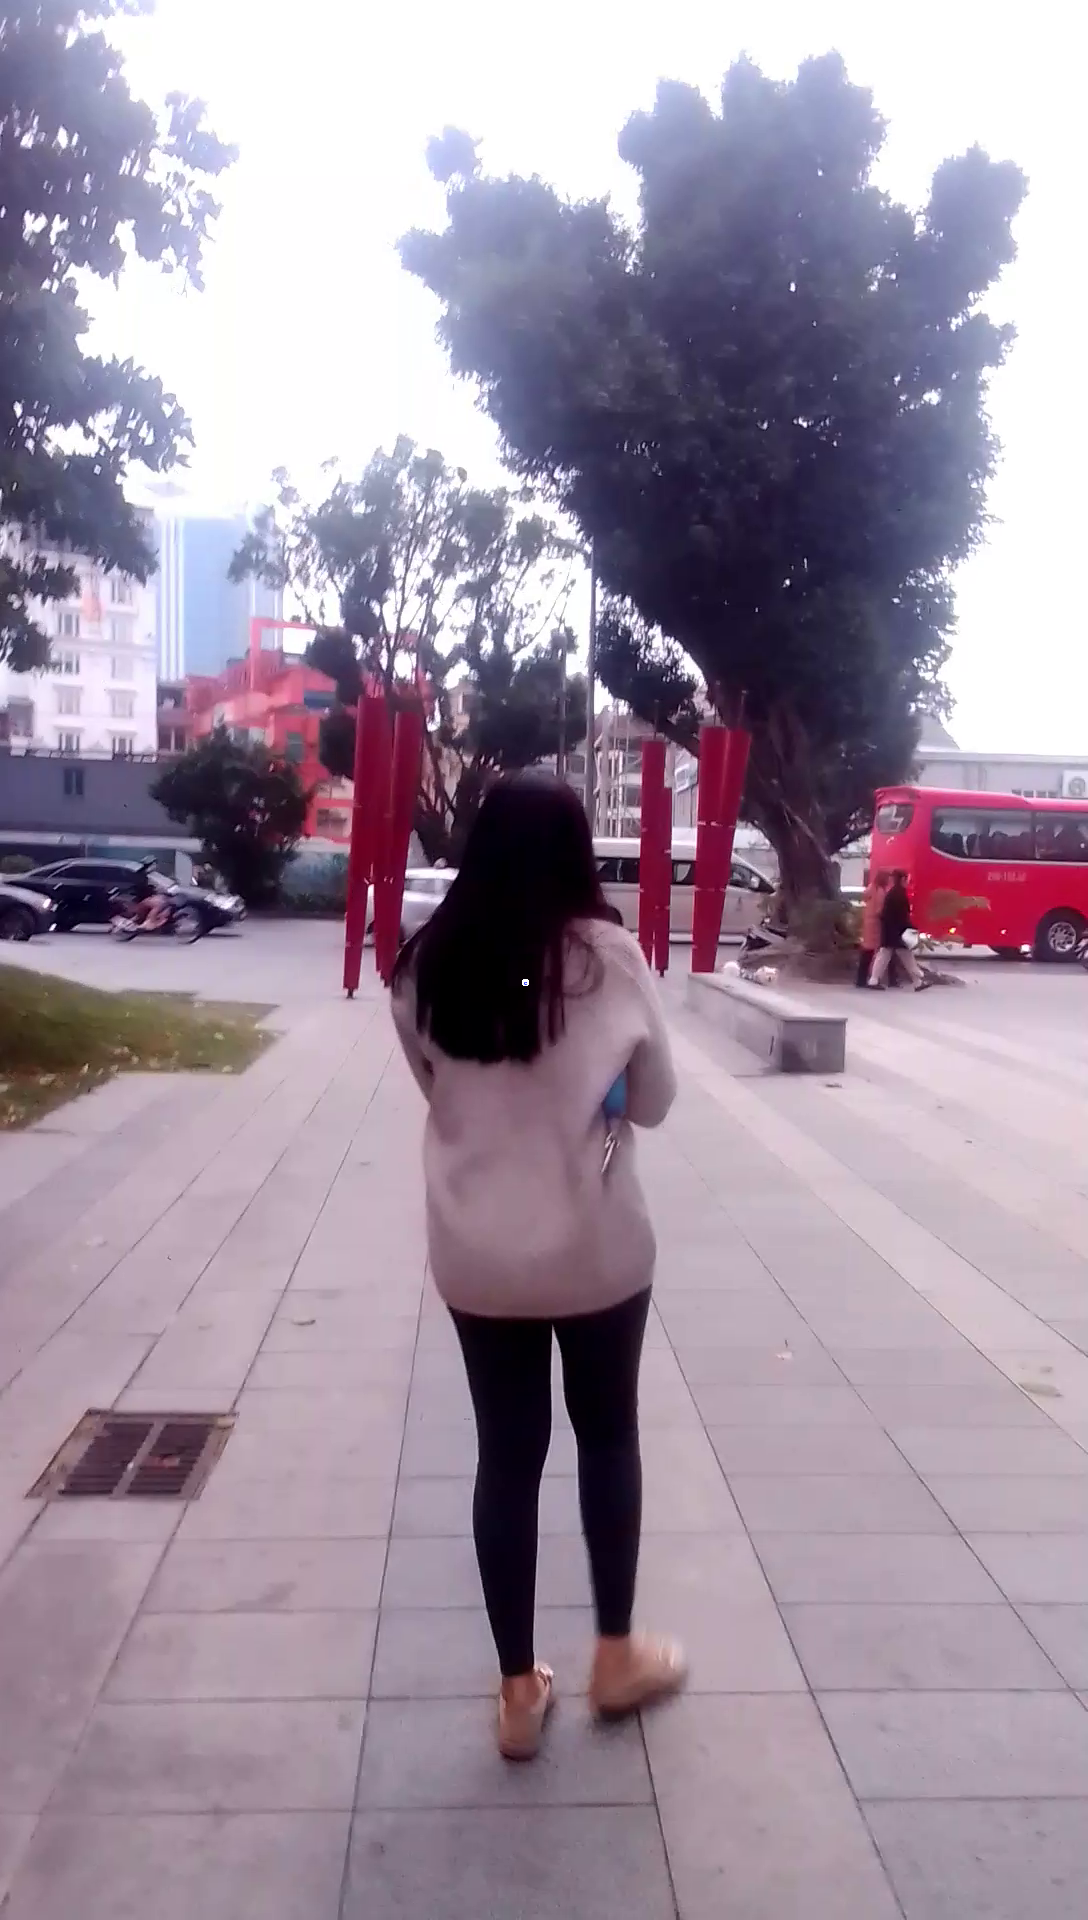

In [89]:
draw.circle_label(
    sample_frame, 
    3,
    chin_point,
    "#FFFFFF",
    "c",
    "/Users/troydo42/Desktop/Body_Matrix/src/assets/Roboto-Bold.ttf",
    "#000AFF"    
)

In [90]:
segment_contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

top_head = process.find_tophead_point(
    selected_kps['left_ear'],
    selected_kps['right_ear'],
    segment_contours
)

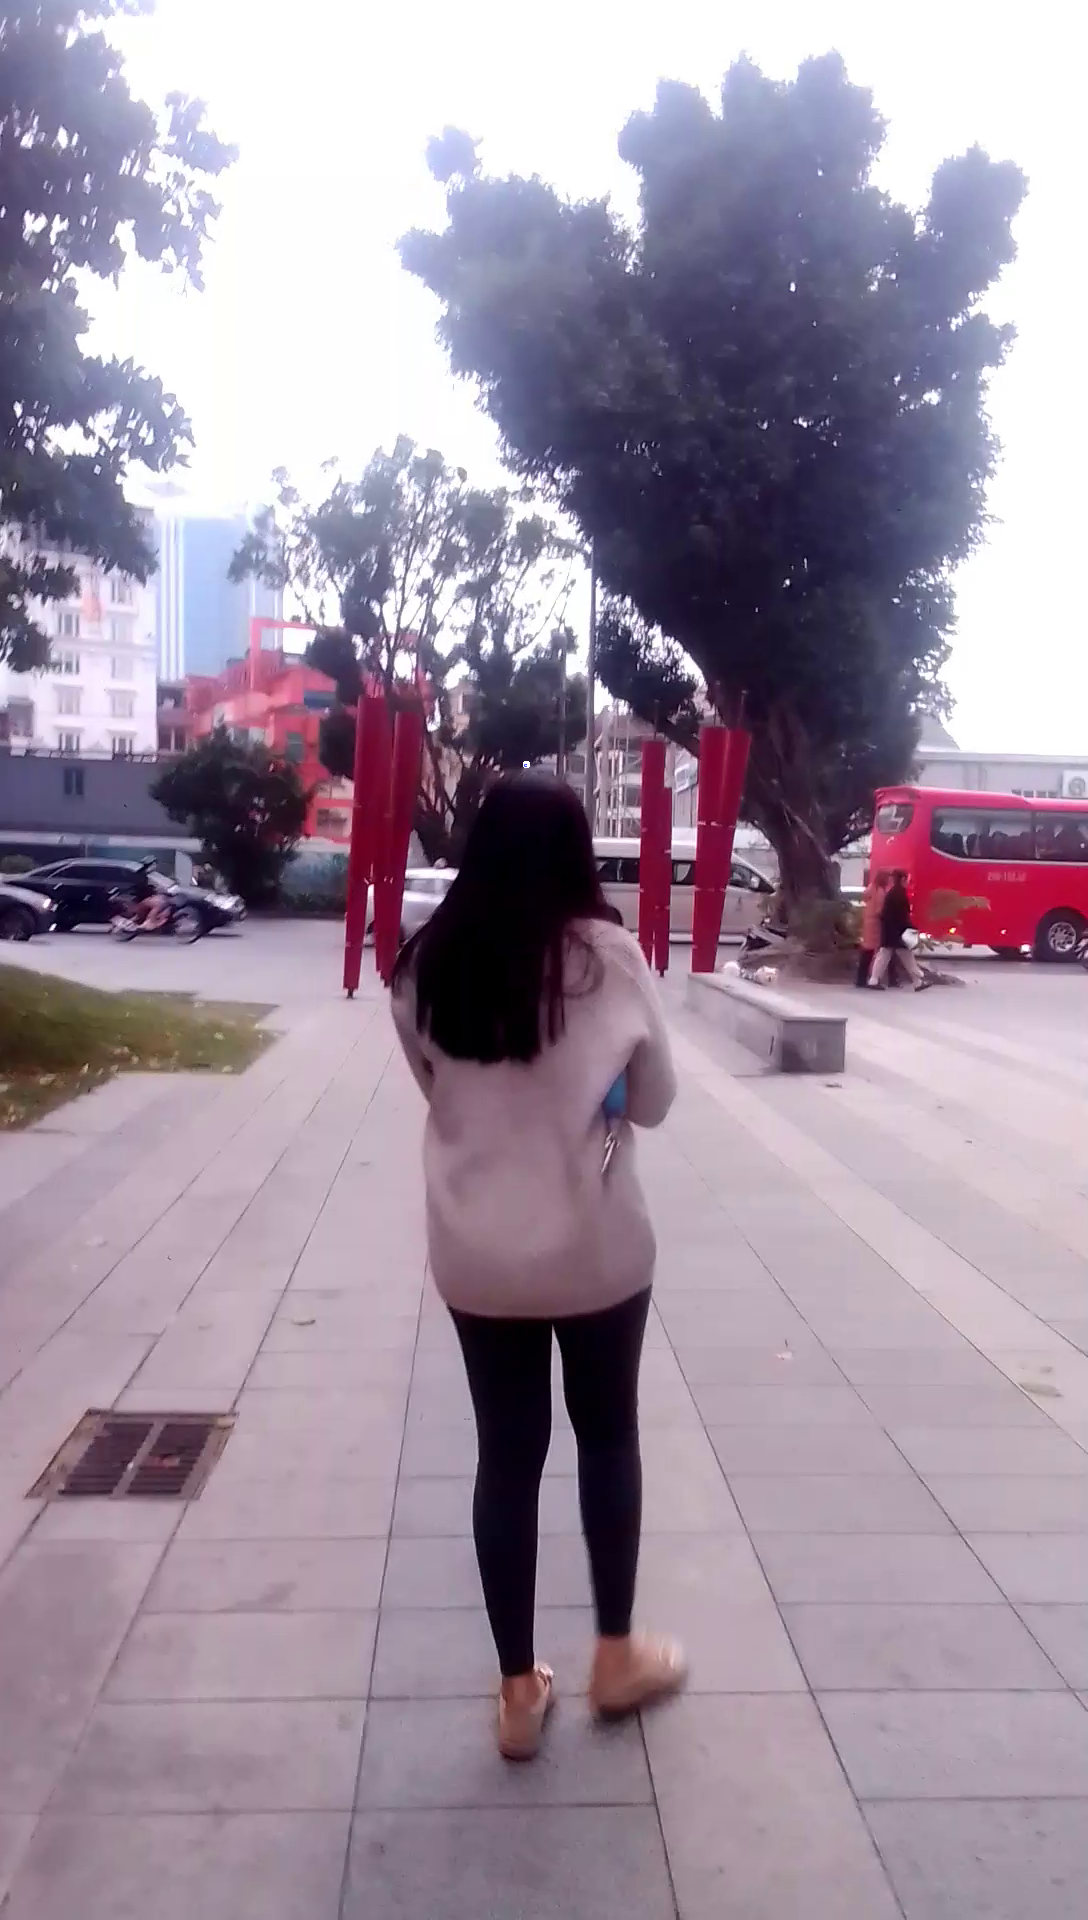

In [91]:
draw.circle_label(
    sample_frame, 
    3,
    top_head,
    "#FFFFFF",
    "c",
    "/Users/troydo42/Desktop/Body_Matrix/src/assets/Roboto-Bold.ttf",
    "#000AFF"    
)

In [92]:
middle_ankle = measure.find_middle_point(
    selected_kps['left_ankle'],
    selected_kps['right_ankle']
)

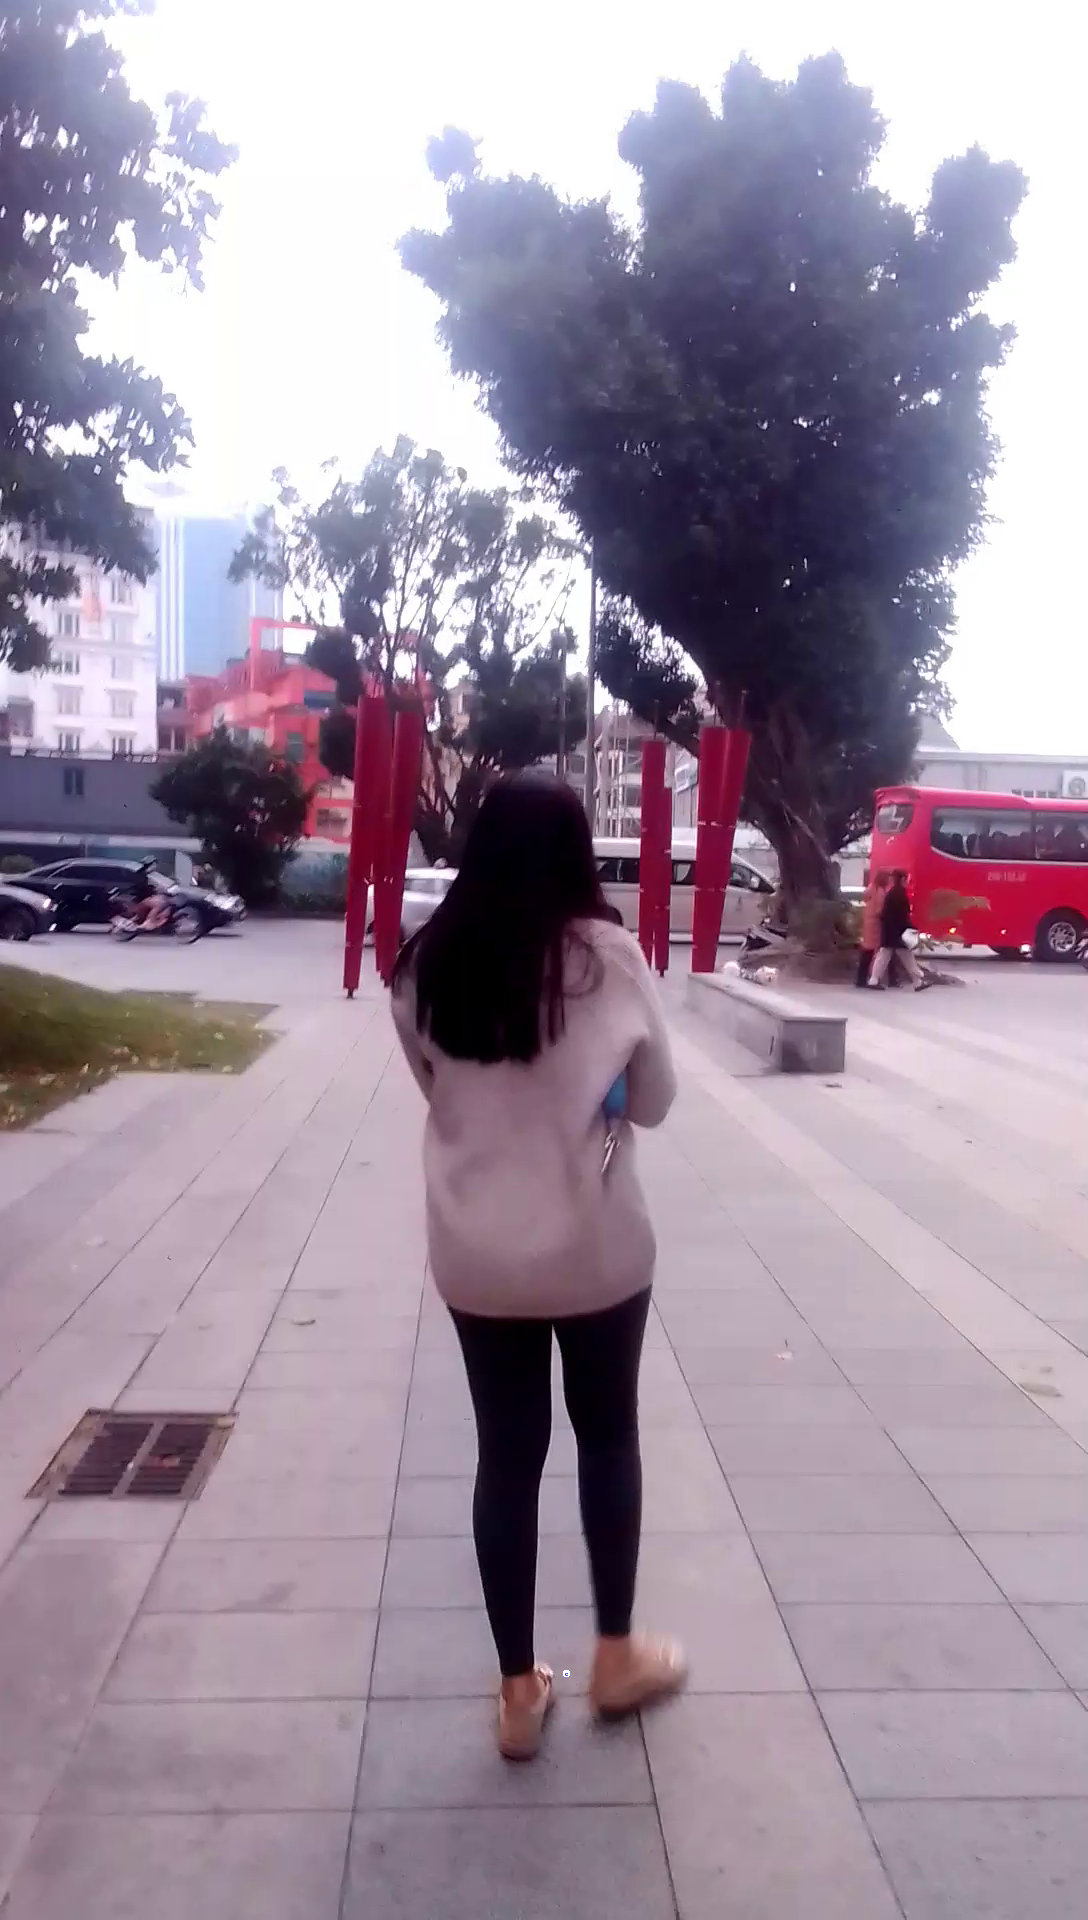

In [93]:
draw.circle_label(
    sample_frame, 
    3,
    middle_ankle ,
    "#FFFFFF",
    "c",
    "/Users/troydo42/Desktop/Body_Matrix/src/assets/Roboto-Bold.ttf",
    "#000AFF"    
)

In [94]:
head_height = measure.two_points_distance(
    top_head, chin_point
)

In [95]:
body_height = measure.two_points_distance(
    top_head, middle_ankle
)

In [96]:
real_height = 23.5 * body_height/head_height
real_hipline = 23.5 * hip_line/head_height
real_shoulderline = 23.5 * shoulder_line/head_height

In [97]:
print(real_height, real_hipline, real_shoulderline)

97.9008872180033 22.796461859440615 25.699541053451302
